In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.ensemble import AdaBoostClassifier

In [8]:
train= pd.read_csv('fordTrain.csv')

In [9]:
test=pd.read_csv('fordTest.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [11]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<AxesSubplot:>

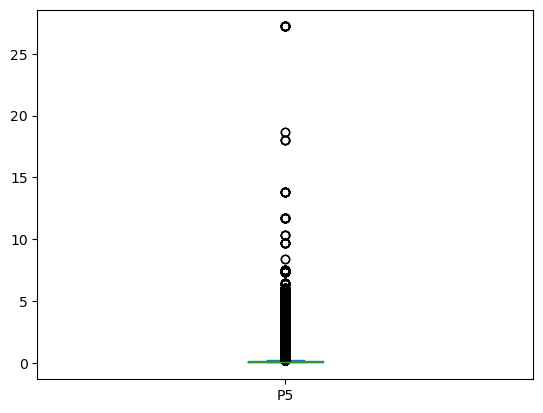

In [12]:
train['P5'].plot(kind='box')

In [13]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<AxesSubplot:>

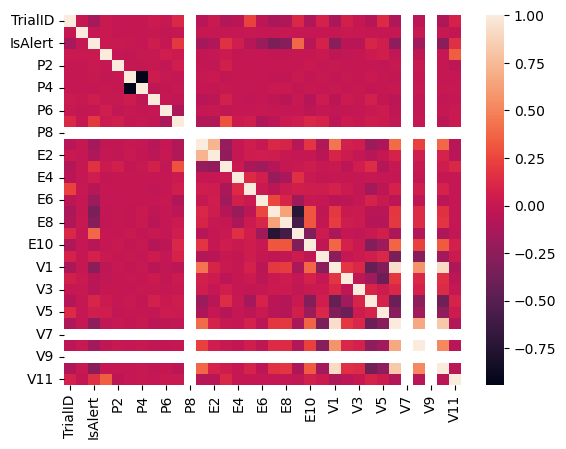

In [18]:
sns.heatmap(train.corr())

In [19]:
x=train.iloc[:,3:]
x

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,...,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [20]:
y=train['IsAlert']
y

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64

In [21]:
print(x.shape)
print(y.shape)

(604329, 30)
(604329,)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)


(483463, 30)
(120866, 30)
(120866,)
(483463,)


In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test) 

E:\an\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [27]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.72
[[129737  73760]
 [ 61853 218113]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66    203497
           1       0.75      0.78      0.76    279966

    accuracy                           0.72    483463
   macro avg       0.71      0.71      0.71    483463
weighted avg       0.72      0.72      0.72    483463



In [28]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  0.72
[[32491 18556]
 [15435 54384]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66     51047
           1       0.75      0.78      0.76     69819

    accuracy                           0.72    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.72      0.72      0.72    120866



In [38]:
lr.predict_proba(x_train)

array([[0.85503031, 0.14496969],
       [0.67333036, 0.32666964],
       [0.69629147, 0.30370853],
       ...,
       [0.59405291, 0.40594709],
       [0.19741123, 0.80258877],
       [0.32828091, 0.67171909]])

In [29]:
  dtree = DecisionTreeClassifier()
  dtree.fit(x_train,y_train)
  preds_dtree_train = dtree.predict(x_train)
  preds_dtree_test = dtree.predict(x_test)

In [40]:
acc_report(y_train,preds_dtree_train)

The accuracy is  1.0
[[203497      0]
 [     0 279966]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203497
           1       1.00      1.00      1.00    279966

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [41]:
acc_report(y_test,preds_dtree_test)

The accuracy is  0.99
[[50361   686]
 [  793 69026]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     51047
           1       0.99      0.99      0.99     69819

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators = 20,max_depth=3, verbose = 1)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.2s finished


RandomForestClassifier(max_depth=3, n_estimators=20, verbose=1)

In [33]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [34]:
acc_report(y_train,preds_rf_train)

The accuracy is  0.81
[[130739  72758]
 [ 17886 262080]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74    203497
           1       0.78      0.94      0.85    279966

    accuracy                           0.81    483463
   macro avg       0.83      0.79      0.80    483463
weighted avg       0.82      0.81      0.81    483463



In [42]:
acc_report(y_test,preds_rf_test)

The accuracy is  0.81
[[32861 18186]
 [ 4421 65398]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74     51047
           1       0.78      0.94      0.85     69819

    accuracy                           0.81    120866
   macro avg       0.83      0.79      0.80    120866
weighted avg       0.82      0.81      0.81    120866

